## Face Recognition

In [25]:
# import modules
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

from mtcnn import MTCNN
from keras_facenet import FaceNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import pickle

#### Test Image

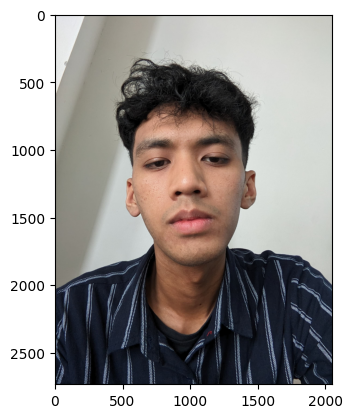

In [16]:
# melihat gambar
path = "../database/Elon Musk/01.jpg"
def read_image(path):
    img = cv.imread(path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    return img

img = read_image(path)

#### Detect Face

In [17]:
# Mendeteksi muka
detector = MTCNN()
result = detector.detect_faces(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [18]:
result


[{'box': [549, 662, 855, 1147],
  'confidence': 0.9993368983268738,
  'keypoints': {'left_eye': (771, 1103),
   'right_eye': (1172, 1071),
   'nose': (973, 1267),
   'mouth_left': (833, 1539),
   'mouth_right': (1186, 1506)}}]

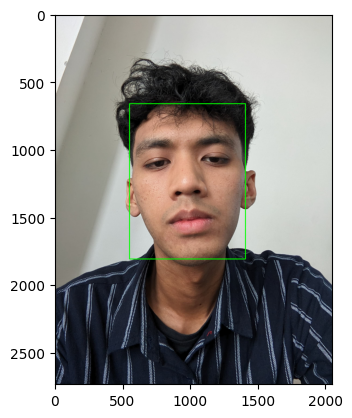

In [19]:
# bounding box
x, y, w, h = result[0]['box']

# draw bounding box on image
img = cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)
plt.imshow(img)

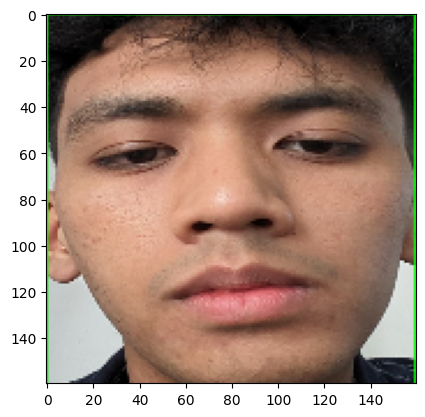

In [20]:
# get image in bounding box
my_face = img[y:y+h, x:x+w]
# resize image cause facenet uisng 160x160 image
my_face = cv.resize(my_face, (160, 160))
plt.imshow(my_face)


### Preprocessing Images

In [21]:
# extract face
def extract_face(detector, filename, target_size=(160, 160)):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x, y, w, h = detector.detect_faces(img)[0]['box']
    x, y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, target_size)
    return face_arr

# load faces
def load_faces(directory, detector):
    faces = []
    for im_name in os.listdir(directory):
        try:
            path = os.path.join(directory, im_name)
            single_face = extract_face(detector, path)
            faces.append(single_face)
        except Exception as e:
            pass
    return faces

# load classes
def load_classes(directory, detector):
    X = []
    Y = []
    for sub_dir in os.listdir(directory):
        path = os.path.join(directory, sub_dir)
        faces = load_faces(path, detector)
        labels = [sub_dir for _ in range(len(faces))]
        print(f"Loaded successfully: {len(labels)}")
        X.extend(faces)
        Y.extend(labels)
    return np.asarray(X), np.asarray(Y)

# plot image
def plot_images(images, labels):
    plt.figure(figsize=(18, 16))
    for num, image in enumerate(images):
        ncols = 3
        nrows = len(labels) // ncols + 1
        plt.subplot(nrows, ncols, num + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

In [22]:
# preprocessing data
path = "./database/"
x, y = load_classes(path, detector)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 980ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━

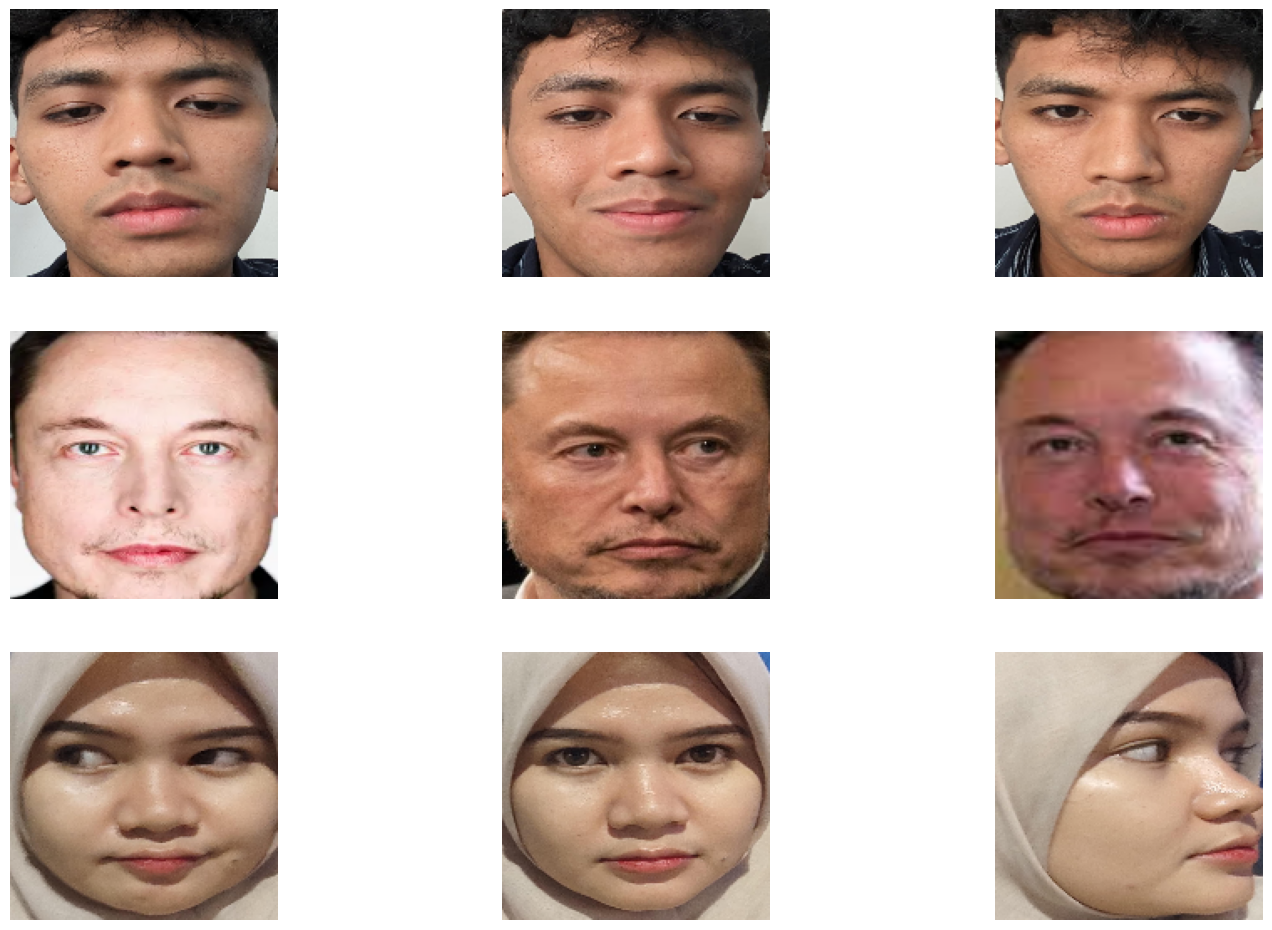

In [23]:
# plot the images
plot_images(x, y)

In [28]:
# embeddings
embedder = FaceNet()
def get_embeddings(img):
    # img = img.astype('float32')
    img = np.expand_dims(img, axis=0)
    embedding = embedder.embeddings(img)
    embedding = embedding[0]
    return embedding

embeddings = np.asarray([get_embeddings(face) for face in x])

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [30]:
# save embeddings
np.savez_compressed("embeddings.npz", embeddings=embeddings, labels=y)

### Modelling

In [31]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [32]:
y

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64)

In [33]:
model = SVC(kernel='linear', probability=True)
model.fit(embeddings, y)

SVC(kernel='linear', probability=True)

In [34]:
yhat_train = model.predict(embeddings)

In [35]:
yhat_train

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=int64)

In [36]:
from sklearn. metrics import accuracy_score

accuracy_score(y, yhat_train)

1.0

### Testing Real Image

In [38]:
# detect face
path = "./database/Aditya/01.jpg"
img = cv.imread(path)
test_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
x, y, w, h = detector.detect_faces(test_img)[0]['box']


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [39]:
# get embedding
test_img = test_img[y:y+h, x:x+w]
test_img = cv.resize(test_img, (160, 160))
test_embedding = get_embeddings(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [40]:
test_embedding

array([ 0.04172342,  0.01211984,  0.00905001,  0.0732661 ,  0.09140271,
       -0.00600796,  0.0420664 , -0.06443286,  0.01576634,  0.0717821 ,
        0.00604235, -0.03097469,  0.02434423,  0.02055116,  0.00684117,
       -0.06270504, -0.01611329,  0.04307833, -0.01831358,  0.12775026,
        0.08964875,  0.01529346,  0.00095722, -0.02927353, -0.04429504,
        0.05959881,  0.06185409, -0.01740064,  0.03409673, -0.07203177,
        0.0647597 ,  0.0759272 , -0.037604  , -0.02174617,  0.09281337,
       -0.07256461, -0.015929  , -0.10458141, -0.00932924,  0.01904049,
       -0.04611129,  0.02803129, -0.02533659, -0.0717034 , -0.04035346,
        0.03732296,  0.00876812,  0.00693898, -0.0239518 , -0.01607939,
        0.00900743, -0.10961331,  0.01203989,  0.05840814, -0.02579418,
       -0.13137457,  0.06287329, -0.01091548, -0.00322887,  0.00980045,
        0.03807884,  0.04948112, -0.00470611, -0.02506218, -0.03649405,
       -0.03768357,  0.03321847, -0.10862686,  0.02421742,  0.01

In [42]:
yhat = model.predict_proba([test_embedding])

In [43]:
yhat

array([[0.68501888, 0.15176039, 0.16322073]])

In [45]:
yhat = np.argmax(yhat)
yhat = encoder.inverse_transform([yhat])
yhat[0]

'Aditya'

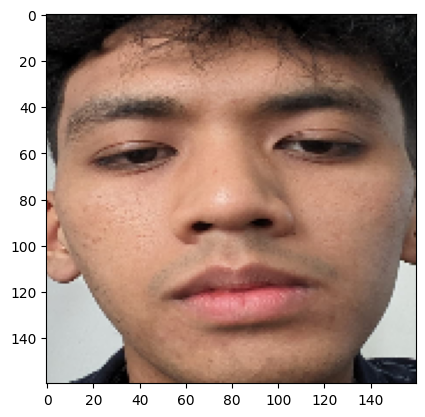

In [46]:
plt.imshow(test_img)

### Save the Model

In [47]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [48]:
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)